In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('USA_Housing.csv')
df.round(3).head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.459,5.683,7.009,4.09,23086.801,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642,6.003,6.731,3.09,40173.072,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067,5.866,8.513,5.13,36882.159,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240,7.188,5.587,3.26,34310.243,1260616.807,USS Barnett\nFPO AP 44820
4,59982.197,5.041,7.839,4.23,26354.109,630943.489,USNS Raymond\nFPO AE 09386


In [36]:
df.shape

(5000, 7)

In [37]:
print(df.isna().sum())
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [38]:
df = df.drop('Address',axis=1)

In [39]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [40]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [41]:
print((0.64+0.45+0.34+0.17+0.41)/5)

0.402


<Axes: >

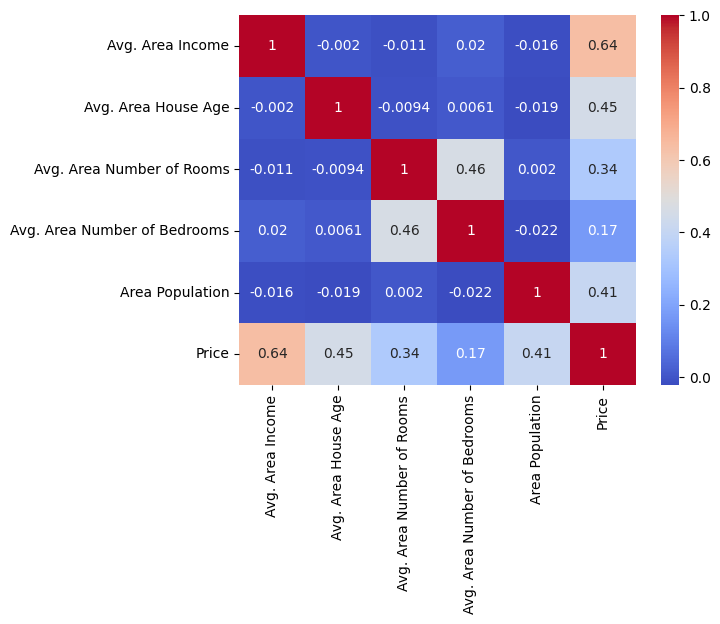

In [42]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [43]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [44]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']]
y = df[['Price']]

In [45]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [46]:
X = pd.DataFrame(scalar.fit_transform(X),columns=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population'])
#y = pd.DataFrame(scalar.fit_transform(y),columns=['Price'])

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
y_train.round()

,Price
2654,1723730.0
2468,1039381.0
290,1648247.0
1463,824541.0
4508,928211.0
...,...
4171,729642.0
599,1599479.0
1361,1102641.0
1547,865100.0


In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [49]:
reg.fit(x_train,y_train)

LinearRegression()

In [50]:
predictions = reg.predict(x_test)

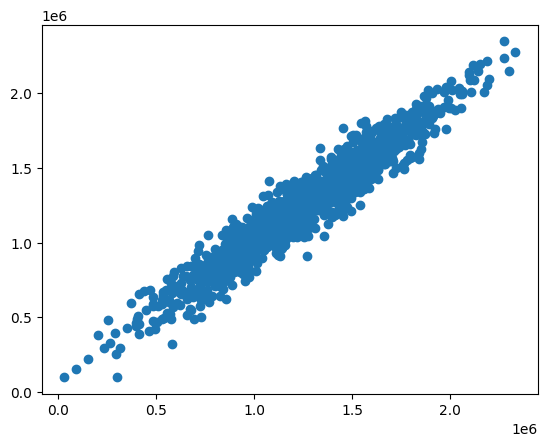

In [51]:
plt.scatter(y_test,predictions)

In [52]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
print(score)

0.9184635249088322
